<a href="https://colab.research.google.com/github/Michele-Simeone/AILabProj-NBA-Scheme-Classification/blob/main/Code/Multi/Multi_Neural_Network_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

### **Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Altri Import**

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# **Dataset**

## **Caricamento Dataset**

In [2]:
#train_dir="/content/drive/MyDrive/LabIA/Dataset/Multi/Train"
#test_dir="/content/drive/MyDrive/LabIA/Dataset/Multi/Test"

train_dir="/content/drive/MyDrive/LabIA/Multi/Train"
test_dir="/content/drive/MyDrive/LabIA/Multi/Test"

batch_dim=16


train_generator = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        validation_split=0.2,
        image_size=(256, 256),  
        batch_size=batch_dim,
        label_mode='int',
        seed=297,
        subset='training')

validation_generator =  tf.keras.utils.image_dataset_from_directory(
        train_dir,
        validation_split=0.2,
        image_size=(256, 256),
        batch_size=batch_dim,
        label_mode='int',
        seed=297,
        subset='validation')

test_generator =  tf.keras.utils.image_dataset_from_directory(
        test_dir,
        image_size=(256, 256),
        batch_size=batch_dim,
        label_mode='int')

Found 819 files belonging to 3 classes.
Using 656 files for training.
Found 819 files belonging to 3 classes.
Using 163 files for validation.
Found 252 files belonging to 3 classes.


### **Plot Dataset**

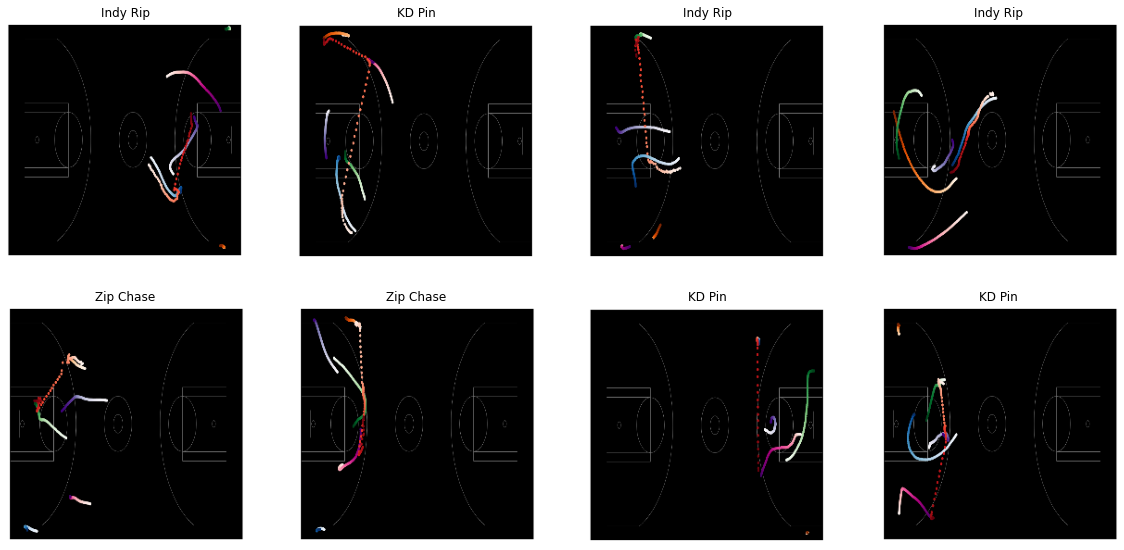

In [3]:
plt.figure(figsize=(20, 20))
for images, labels in train_generator.take(1):
  for i in range(8): 
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_generator.class_names[labels[i]])
    plt.axis("off")

### **Operazioni per Ottimizzazione della Memoria**

In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_generator = train_generator.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_generator = validation_generator.cache().prefetch(buffer_size=AUTOTUNE)


## **Funzione per disegnare le Learning Curves**

In [5]:
def learning_curves(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']


  loss = history.history['loss']
  val_loss = history.history['val_loss']


  epochs = range(len(acc))


  plt.plot(epochs, acc,"tab:green", label="Training")
  plt.plot(epochs, val_acc,"tab:blue", label="Validation")
  plt.legend(loc="upper left")
  plt.title('Training and validation accuracy')

  plt.figure()


  plt.plot(epochs, loss,"tab:green", label="Training")
  plt.plot(epochs, val_loss,"tab:blue", label="Validation")
  plt.legend(loc="upper right")
  plt.title('Training and validation loss')


# **CNN**

## **Model**

In [11]:
# 256x256 per i pixels dell'immagine, and 3 per i canali
i_input = layers.Input(shape=(256, 256, 3))

x = layers.Conv2D(32, 3, activation='tanh')(i_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(30, 3, activation='tanh')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(30, 3, activation='tanh')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(30, 3, activation='tanh')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)

# Flatten della feature map a un tensore ad una dim così creiamo un full-connected layer
x = layers.Flatten()(x)

x = layers.Dense(20,activation='relu')(x)
x = layers.Dense(15,activation='relu')(x)

# Creazione di un layer output con softmax
output = layers.Dense(3, activation='softmax')(x)


model = Model(i_input, output)


model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 30)      8670      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 30)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 30)        8130

## **Compilazione**

In [12]:
lr=0.001

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=lr),
              metrics=['acc'])

## **Train**

In [13]:
epoche=50
es=EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=4)
mc=ModelCheckpoint('/content/drive/MyDrive/LabIA/Best Model/best_model1_multi.h5', monitor='val_accuracy', mode='max')
with tf.device('/gpu:0'):
  history = model.fit(
        train_generator,
        epochs=epoche,
        validation_data=validation_generator,
        callbacks=[mc,es])

Epoch 1/50
41/41 [==============================] - 3s 45ms/step - loss: 1.2653 - acc: 0.3247 - val_loss: 1.0923 - val_acc: 0.3620
Epoch 2/50
41/41 [==============================] - 1s 31ms/step - loss: 1.1343 - acc: 0.3582 - val_loss: 1.1805 - val_acc: 0.3620
Epoch 3/50
41/41 [==============================] - 1s 31ms/step - loss: 1.1022 - acc: 0.3521 - val_loss: 1.1202 - val_acc: 0.3190
Epoch 4/50
41/41 [==============================] - 1s 31ms/step - loss: 1.0753 - acc: 0.4345 - val_loss: 1.0769 - val_acc: 0.4601
Epoch 5/50
41/41 [==============================] - 1s 31ms/step - loss: 0.9044 - acc: 0.5655 - val_loss: 0.8759 - val_acc: 0.6012
Epoch 6/50
41/41 [==============================] - 1s 31ms/step - loss: 0.6075 - acc: 0.6982 - val_loss: 0.6287 - val_acc: 0.6626
Epoch 7/50
41/41 [==============================] - 1s 31ms/step - loss: 0.4858 - acc: 0.7302 - val_loss: 0.5767 - val_acc: 0.6442
Epoch 8/50
41/41 [==============================] - 1s 31ms/step - loss: 0.4126 - a

### **Effetto del Modello su un'Immagine disegnato**

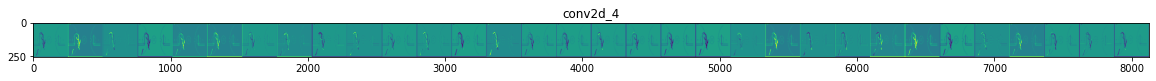

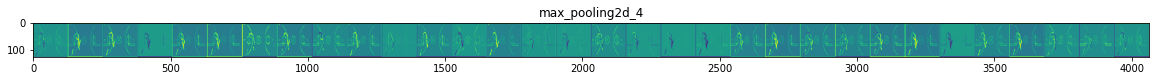

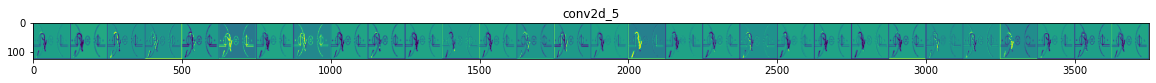

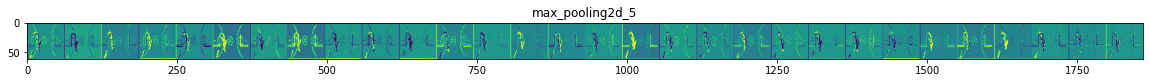

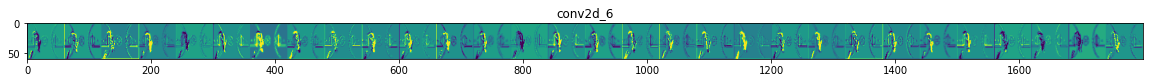

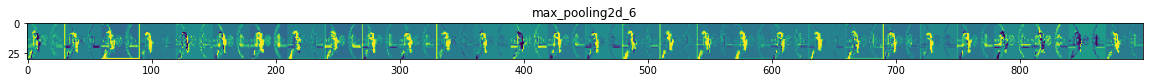

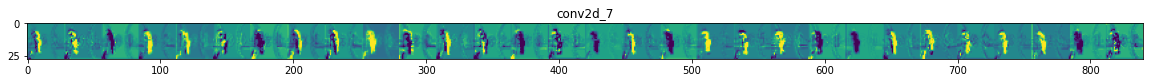

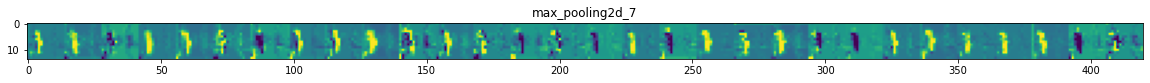

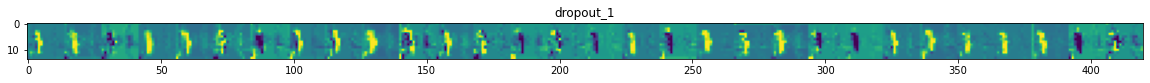

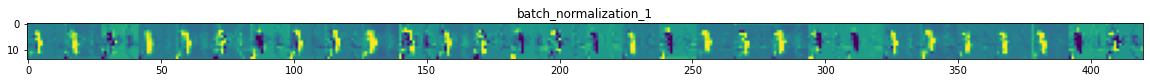

In [14]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(i_input, successive_outputs)


#img_path =  "/content/drive/MyDrive/LabIA/Dataset/Multi/Train/Indy Rip/12.png"
img_path= "/content/drive/MyDrive/LabIA/Multi/Test/Indy Rip/0 (1).png"


img = load_img(img_path, target_size=(256, 256))  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  


x /= 255


successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers[1:]]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1] 
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### **Disegno Learning Curves**

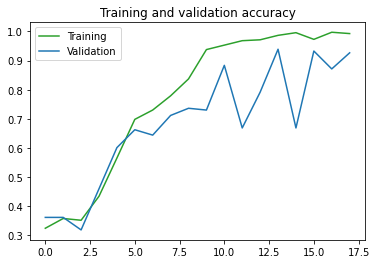

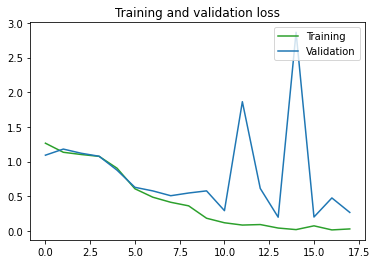

In [15]:
learning_curves(history)

### **Caricamento dei pesi su Drive**

In [12]:
model.load_weights("/content/drive/MyDrive/LabIA/Best Model/best_model1_multi.h5")

## **Test**

In [16]:
results = model.evaluate(
      test_generator,
      batch_size=batch_dim)
print("test loss, test acc:", results)


16/16 [==============================] - 4s 162ms/step - loss: 0.7179 - acc: 0.8571
test loss, test acc: [0.7178980708122253, 0.8571428656578064]


### **Salvataggio del modello**

In [17]:
model.save("/content/drive/MyDrive/LabIA/Model/NBA_model_multi")

## **Prediction**

### **Caricamento del modello**

In [18]:
load_model = tf.keras.models.load_model("/content/drive/MyDrive/LabIA/Model/NBA_model_multi")

### **Plot delle prediction**

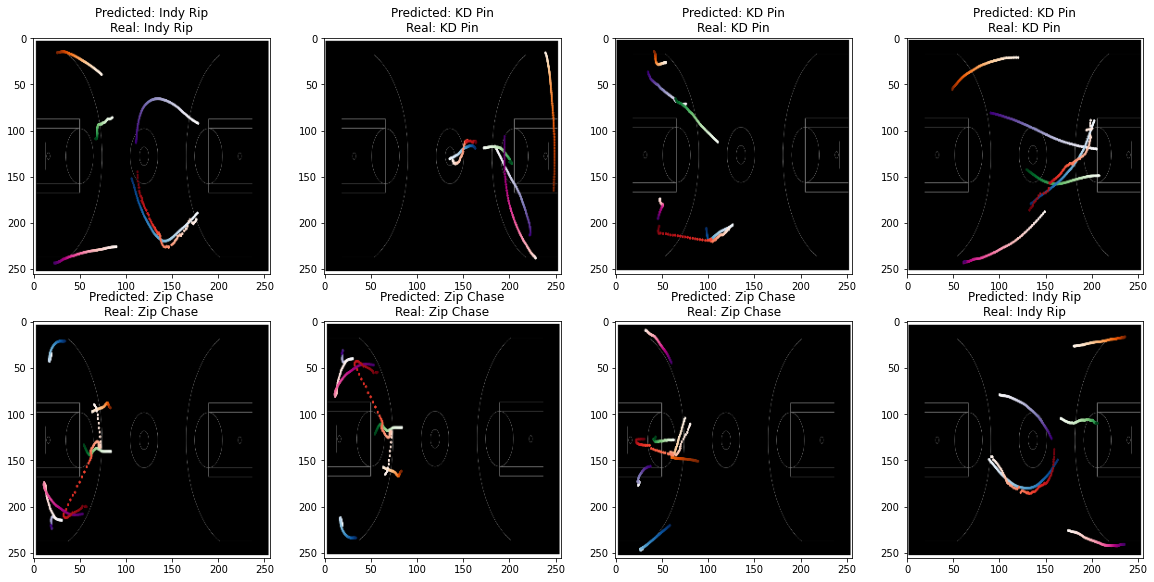

In [19]:
plt.figure(figsize=(20, 20))
for images, labels in test_generator.take(1):
  for i in range(8): 
    ax = plt.subplot(4, 4, i + 1)
    img = images[i].numpy().astype("uint8")
    
    
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 

    predictions = load_model.predict(img_array)
    predictions = tf.nn.softmax(predictions[0])

    plt.title("Predicted: " + test_generator.class_names[np.argmax(predictions)] + "\n" + "Real: " + test_generator.class_names[labels[i]])
    plt.imshow(img)

# **SVM**

## **Model**

In [6]:
i_input = layers.Input(shape=(256, 256, 3))

x=layers.Rescaling(1./255, input_shape=(256, 256, 3))(i_input)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(30, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(30, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(30, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)

# Flatten della feature map a un tensore ad una dim così creiamo un full-connected layer
x = layers.Flatten()(x)

x = layers.Dense(20,activation='relu')(x)
x = layers.Dense(15,activation='relu')(x)

# Creazione di un layer output con softmax
output = layers.Dense(3, kernel_regularizer=l2(0.01),activation = "softmax")(x)

model2 = Model(i_input, output)

model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 30)      8670      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 30)       0         
 2D)                                                         

## **Compilazione**

In [7]:
lr=0.001

model2.compile(loss='squared_hinge',
              optimizer=Adam(learning_rate=lr),
              metrics=['acc'])

## **Train**

In [8]:
epoche=50
es=EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=4)
mc=ModelCheckpoint('/content/drive/MyDrive/LabIA/Best Model/best_svm_multi_model.h5', monitor='val_accuracy', mode='max')

with tf.device('/gpu:0'):
  history2 = model2.fit(
        train_generator,
        epochs=epoche,
        validation_data=validation_generator,
        callbacks=[mc,es])

Epoch 1/50
41/41 [==============================] - 16s 73ms/step - loss: 0.5942 - acc: 0.3277 - val_loss: 0.5644 - val_acc: 0.2945
Epoch 2/50
41/41 [==============================] - 1s 33ms/step - loss: 0.5826 - acc: 0.3064 - val_loss: 0.5569 - val_acc: 0.2945
Epoch 3/50
41/41 [==============================] - 1s 31ms/step - loss: 0.5756 - acc: 0.3216 - val_loss: 0.5505 - val_acc: 0.3558
Epoch 4/50
41/41 [==============================] - 1s 32ms/step - loss: 0.5697 - acc: 0.3216 - val_loss: 0.5452 - val_acc: 0.3497
Epoch 5/50
41/41 [==============================] - 1s 31ms/step - loss: 0.5648 - acc: 0.3216 - val_loss: 0.5407 - val_acc: 0.3436
Epoch 6/50
41/41 [==============================] - 1s 31ms/step - loss: 0.5608 - acc: 0.3171 - val_loss: 0.5371 - val_acc: 0.3497
Epoch 7/50
41/41 [==============================] - 1s 31ms/step - loss: 0.5575 - acc: 0.3079 - val_loss: 0.5342 - val_acc: 0.3497
Epoch 7: early stopping


### **Disegno Learning Curves**

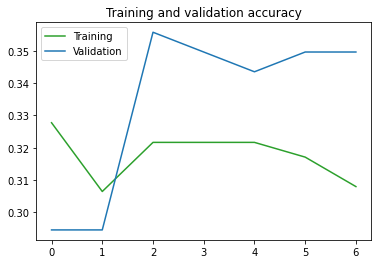

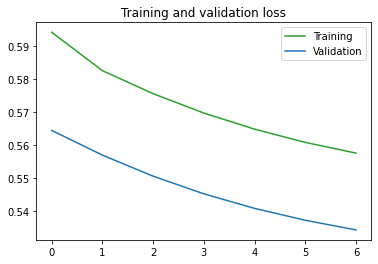

In [9]:
learning_curves(history2)

## **Test**

In [10]:
model2.load_weights("/content/drive/MyDrive/LabIA/Best Model/best_svm_multi_model.h5")
results2 = model2.evaluate(
      test_generator,
      batch_size=batch_dim)
print("test loss, test acc:", results2)

16/16 [==============================] - 2s 85ms/step - loss: 0.5980 - acc: 0.2897
test loss, test acc: [0.5979778170585632, 0.289682537317276]


# **ResNet50V2**

## **Model**

### **Pre-Model**

In [12]:
pre_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(256, 256, 3),
                                                        include_top=False,
                                                        weights='imagenet',
                                                        classes=3,
                                                        pooling='avg')
pre_model.trainable = False

### **Total Model**

In [13]:
i_input = layers.Input(shape=(256, 256, 3))
x = tf.keras.applications.resnet_v2.preprocess_input(i_input)
x = pre_model(x,training=False)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation = 'relu')(x)

output = layers.Dense(3, activation='softmax')(x)

res_model = Model(i_input, output)

res_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 256, 256, 3)      0         
 bda)                                                            
                                                                 
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192

## **Compilazione**

In [14]:
lr=0.001

res_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=lr),
              metrics=['acc'])

## **Train**

In [15]:
epoche=50
es=EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=4)
mc=ModelCheckpoint('/content/drive/MyDrive/LabIA/Best Model/best_res_multi_model.h5', monitor='val_accuracy', mode='max')

with tf.device('/gpu:0'):
  history_res = res_model.fit(
        train_generator,
        epochs=epoche,
        validation_data=validation_generator,
        callbacks=[mc,es])

Epoch 1/50
41/41 [==============================] - 8s 127ms/step - loss: 1.2746 - acc: 0.5518 - val_loss: 1.1841 - val_acc: 0.4724
Epoch 2/50
41/41 [==============================] - 4s 90ms/step - loss: 0.4143 - acc: 0.8552 - val_loss: 0.7932 - val_acc: 0.6871
Epoch 3/50
41/41 [==============================] - 4s 91ms/step - loss: 0.2564 - acc: 0.9085 - val_loss: 0.6650 - val_acc: 0.7178
Epoch 4/50
41/41 [==============================] - 4s 92ms/step - loss: 0.1390 - acc: 0.9497 - val_loss: 0.6884 - val_acc: 0.6933
Epoch 5/50
41/41 [==============================] - 4s 90ms/step - loss: 0.1532 - acc: 0.9451 - val_loss: 0.5622 - val_acc: 0.7669
Epoch 6/50
41/41 [==============================] - 4s 91ms/step - loss: 0.1304 - acc: 0.9558 - val_loss: 0.5734 - val_acc: 0.7791
Epoch 7/50
41/41 [==============================] - 4s 92ms/step - loss: 0.0499 - acc: 0.9863 - val_loss: 0.5803 - val_acc: 0.7730
Epoch 8/50
41/41 [==============================] - 4s 90ms/step - loss: 0.0495 - 

### **Disegno Learning Curves**

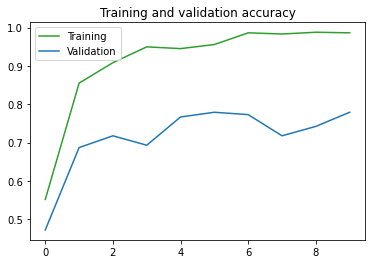

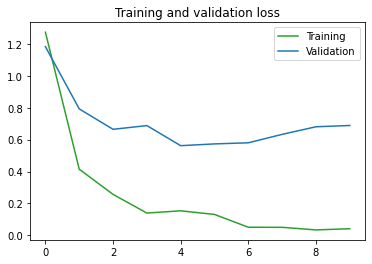

In [16]:
learning_curves(history_res)

## **Test**

In [17]:
res_model.load_weights("/content/drive/MyDrive/LabIA/Best Model/best_res_multi_model.h5")
results_res = res_model.evaluate(
      test_generator,
      batch_size=batch_dim)
print("test loss, test acc:", results_res)

16/16 [==============================] - 3s 100ms/step - loss: 1.8025 - acc: 0.6071
test loss, test acc: [1.802459478378296, 0.6071428656578064]
